In [1]:
import numpy as np
import time
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
%matplotlib inline

In [2]:
from astroquery.vizier import Vizier

In [34]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord

In [38]:
def plotVizierLense(d,center,r=(-5,5),pm=True):
    scale = u.arcsecond.to(u.deg)
    x = (d.RA_ICRS-center.ra.deg)/scale
    y = (d.DE_ICRS-center.dec.deg)/scale
    plt.errorbar(x,y,xerr=d.e_RA_ICRS, yerr=d.e_DE_ICRS,fmt='.')
    plt.scatter(x,y,s=100*np.exp(20-d.Gmag))
    if pm : 
        vx = d.pmRA
        vy = d.pmDE
        plt.quiver(x,y, vx, vy, angles='xy', scale_units='xy', scale=1)
        plt.errorbar(x+vx,y+vy,xerr=d.e_pmRA, yerr=d.e_pmDE,fmt='o')
    plt.grid()
    plt.xlabel("gaia.ra - center.ra [\"]")
    plt.ylabel("gaia.dec - center.dec [\"]")
    plt.title(center)
    plt.xlim(r)
    plt.ylim(r)

In [40]:
qso =  SkyCoord.from_name("HE 0435-1223")

In [41]:
d = Vizier.query_region(qso,catalog='I/345/gaia2',radius='5000 mas').values()[0].to_pandas()

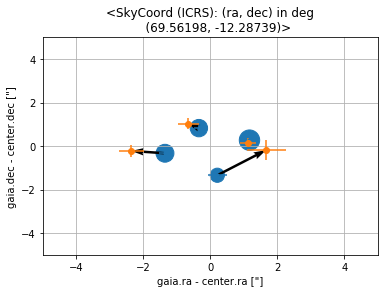

In [42]:
plotVizierLense(d,qso)

In [54]:
qso =  SkyCoord.from_name("Q1634+267")

In [55]:
r = Vizier.query_region(qso,catalog='I/345/gaia2',radius='5000 mas')

In [56]:
r

Empty TableList

In [63]:
qso =  SkyCoord.from_name("SDSS1004+4112")

In [64]:
r = Vizier.query_region(qso,catalog='I/345/gaia2',radius='5000 mas')
r

TableList with 1 tables:
	'0:I/345/gaia2' with 32 column(s) and 2 row(s) 

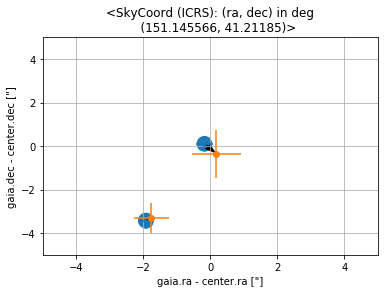

In [66]:
d=r.values()[0].to_pandas()
plotVizierLense(d,qso)